In [43]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d

# Question 1

# (a)

In [44]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [45]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [46]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [47]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    1   1      1
1    1   1      1
2    0   0      1
3    0   1      1
4    0   1      1
..  ..  ..    ...
95   1   1      1
96   1   1      1
97   1   0      1
98   0   1      1
99   0   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   1      2
1    1   0      2
2    1   0      2
3    1   0      2
4    1   1      2
..  ..  ..    ...
95   1   0      2
96   1   1      2
97   1   0      2
98   1   0      2
99   1   0      2

[100 rows x 3 columns]


# MLE

In [48]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [49]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [50]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [51]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.48 0.8 ]


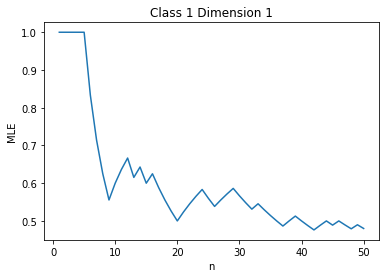

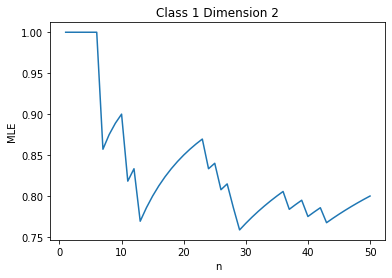

In [52]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [53]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [54]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.88 0.18]


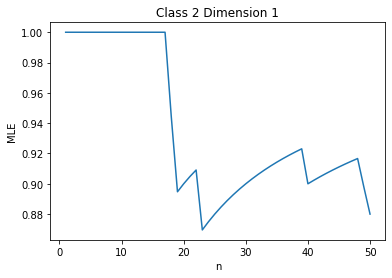

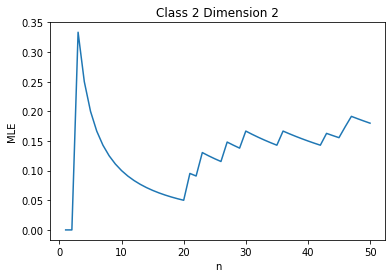

In [55]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

# (d)

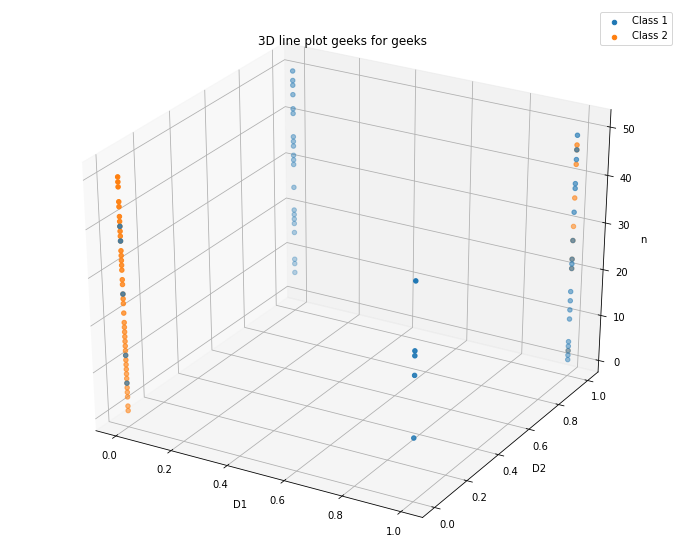

In [57]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('3D line plot geeks for geeks')
plt.legend()
plt.show()
